### Confirm Tensorflow Installation

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
print(tf.__version__)
print(keras.__version__)

2.6.0
2.6.0


In [2]:
#import os
#os.environ["CUDA_VISIBLE_DEVICES"]='0'
#tf.test.is_built_with_cuda()
#tf.test.is_built_with_gpu_support()
#tf.config.list_physical_devices('GPU')

### Importing the necessary modules

In [6]:
import numpy as np
import os
from os import listdir 
from os.path import isfile, join
import cv2

import tensorflow as tf
import tensorflow.keras as keras


### Loading and Preprocessing

In [7]:
#Data visiting – os.walk()

label_folder = []
total_size = 0
data_path = r"D:\CIFAR10_Test Image\Training_data"

#os.walk() generates the file names(dirpath, dirnames, filenames) 
#in a directory tree by walking the tree either top-down or bottom-up.
for root, dirts, files in os.walk(data_path): 
    for dirt in dirts:
        label_folder.append(dirt)
    total_size += len(files)

    
print("found",total_size,"files.")
print("folder:",label_folder)

found 25000 files.
folder: ['0', '1', '2', '3', '4']


In [8]:
#Load image

base_x_train = []
base_y_train = []

for i in range(len(label_folder)):
    labelPath = data_path+r'\\'+label_folder[i]
    
    #listdir() returns a list containing the names of the entries in the directory given by path.
    #isfile() is used to check whether the specified path is an existing regular file or not.
    FileName = [f for f in listdir(labelPath) if isfile(join(labelPath, f))]
    
    for j in range(len(FileName)):
        path = labelPath+r'\\'+FileName[j]
        
        #use cv2.imread read image.
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        
        base_x_train.append(img)
        base_y_train.append(label_folder[i])


print(np.array(base_x_train).shape)
print(np.array(base_y_train).shape)
        

(25000, 32, 32, 3)
(25000,)


In [9]:
from tensorflow.keras.utils import to_categorical

#Convert a category vector to a binary (0 or 1) matrix-type representation

base_y_train = to_categorical(base_y_train)


print(np.array(base_x_train).shape)
print(np.array(base_y_train).shape)
        

(25000, 32, 32, 3)
(25000, 5)


### Splitting the Data into training and validation data

In [10]:
# Split into training and validation sets
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split( \
    np.array(base_x_train), np.array(base_y_train), test_size=0.2, random_state = 0)

print("Training data:", x_train.shape, y_train.shape)
print("Validation data:", x_valid.shape, y_valid.shape)

Training data: (20000, 32, 32, 3) (20000, 5)
Validation data: (5000, 32, 32, 3) (5000, 5)


### Show the image

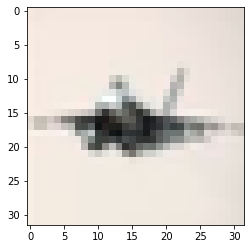

Answer: 0
Answer(one-hot): [1. 0. 0. 0. 0.]


In [11]:
import random
import matplotlib.pyplot as plt

idx = random.randint(0, x_train.shape[0])
plt.imshow(x_train[idx])
plt.show()

print("Answer:", np.argmax(y_train[idx]))
print("Answer(one-hot):", y_train[idx])

### Build the network

In [15]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(128, (3, 3), padding="same", activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), padding="same", activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(256, (3, 3), padding="same", activation='relu'),
    tf.keras.layers.Conv2D(256, (3, 3), padding="same", activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(5, activation='softmax')
])

### Training the network

In [16]:
epoch = 10
batch_size = 50

model1.compile(
    loss="categorical_crossentropy", 
    optimizer="sgd", 
    metrics=["accuracy"]
)
history = model1.fit(
    x_train, 
    y_train, 
    epochs=epoch, 
    batch_size=batch_size,
    validation_data=(x_valid, y_valid)
)

Epoch 1/10
400/400 [==============================] - 29s 71ms/step - loss: 1.4977 - accuracy: 0.3646 - val_loss: 1.3321 - val_accuracy: 0.5066
Epoch 2/10
400/400 [==============================] - 29s 72ms/step - loss: 1.2526 - accuracy: 0.5139 - val_loss: 1.1381 - val_accuracy: 0.5596
Epoch 3/10
400/400 [==============================] - 28s 71ms/step - loss: 1.0715 - accuracy: 0.5855 - val_loss: 0.9954 - val_accuracy: 0.6226
Epoch 4/10
400/400 [==============================] - 29s 73ms/step - loss: 0.9519 - accuracy: 0.6346 - val_loss: 0.9046 - val_accuracy: 0.6572
Epoch 5/10
400/400 [==============================] - 29s 73ms/step - loss: 0.8636 - accuracy: 0.6718 - val_loss: 0.8574 - val_accuracy: 0.6718
Epoch 6/10
400/400 [==============================] - 29s 73ms/step - loss: 0.7916 - accuracy: 0.6981 - val_loss: 0.7948 - val_accuracy: 0.7006
Epoch 7/10
400/400 [==============================] - 29s 73ms/step - loss: 0.7328 - accuracy: 0.7258 - val_loss: 0.7831 - val_accuracy:

In [17]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (4, 4), padding="same", activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(64, (4, 4), padding="same", activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(128, (4, 4), padding="same", activation='relu'),
    tf.keras.layers.Conv2D(128, (4, 4), padding="same", activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(256, (4, 4), padding="same", activation='relu'),
    tf.keras.layers.Conv2D(256, (4, 4), padding="same", activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [18]:
epoch = 10
batch_size = 50

model2.compile(
    loss="categorical_crossentropy", 
    optimizer="sgd", 
    metrics=["accuracy"]
)
history = model2.fit(
    x_train, 
    y_train, 
    epochs=epoch, 
    batch_size=batch_size,
    validation_data=(x_valid, y_valid)
)

Epoch 1/10
400/400 [==============================] - 93s 211ms/step - loss: 1.4374 - accuracy: 0.4042 - val_loss: 1.2896 - val_accuracy: 0.4792
Epoch 2/10
400/400 [==============================] - 83s 207ms/step - loss: 1.1736 - accuracy: 0.5450 - val_loss: 1.0719 - val_accuracy: 0.5824
Epoch 3/10
400/400 [==============================] - 82s 205ms/step - loss: 1.0244 - accuracy: 0.6060 - val_loss: 0.9701 - val_accuracy: 0.6260
Epoch 4/10
400/400 [==============================] - 82s 205ms/step - loss: 0.9066 - accuracy: 0.6556 - val_loss: 0.9096 - val_accuracy: 0.6428
Epoch 5/10
400/400 [==============================] - 82s 205ms/step - loss: 0.8236 - accuracy: 0.6895 - val_loss: 0.8691 - val_accuracy: 0.6628: 0.8328 - ETA: 24s - loss: 0.8306 - accuracy - E
Epoch 6/10
400/400 [==============================] - 83s 207ms/step - loss: 0.7524 - accuracy: 0.7157 - val_loss: 0.8330 - val_accuracy: 0.6730
Epoch 7/10
400/400 [==============================] - 85s 211ms/step - loss: 0.68

In [19]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(128, (3, 3), padding="same", activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), padding="same", activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(256, (4, 4), padding="same", activation='relu'),
    tf.keras.layers.Conv2D(256, (4, 4), padding="same", activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [20]:
epoch = 10
batch_size = 50

model3.compile(
    loss="categorical_crossentropy", 
    optimizer="sgd", 
    metrics=["accuracy"]
)
history = model3.fit(
    x_train, 
    y_train, 
    epochs=epoch, 
    batch_size=batch_size,
    validation_data=(x_valid, y_valid)
)

Epoch 1/10
400/400 [==============================] - 52s 125ms/step - loss: 1.4487 - accuracy: 0.3987 - val_loss: 1.2771 - val_accuracy: 0.5170
Epoch 2/10
400/400 [==============================] - 50s 126ms/step - loss: 1.1721 - accuracy: 0.5451 - val_loss: 1.1595 - val_accuracy: 0.5516
Epoch 3/10
400/400 [==============================] - 50s 124ms/step - loss: 1.0076 - accuracy: 0.6151 - val_loss: 0.9633 - val_accuracy: 0.6346
Epoch 4/10
400/400 [==============================] - 50s 124ms/step - loss: 0.8845 - accuracy: 0.6651 - val_loss: 0.8780 - val_accuracy: 0.6652
Epoch 5/10
400/400 [==============================] - 49s 123ms/step - loss: 0.7957 - accuracy: 0.6999 - val_loss: 0.7790 - val_accuracy: 0.7020
Epoch 6/10
400/400 [==============================] - 49s 122ms/step - loss: 0.7199 - accuracy: 0.7338 - val_loss: 0.7372 - val_accuracy: 0.7270
Epoch 7/10
400/400 [==============================] - 49s 123ms/step - loss: 0.6472 - accuracy: 0.7660 - val_loss: 0.7053 - val_ac

### Saving the trained weights

In [25]:
model.save("my_model0501.hdf5")

In [26]:
from tensorflow.keras.models import load_model
model2 = load_model("my_model0501.hdf5")

In [27]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 256)         2

In [28]:
y_hat = model2.predict(x_valid)

In [29]:
# 將output改為標籤
output_y = np.zeros(y_hat.shape[0])

for i in range(y_hat.shape[0]):
    for j in range(y_hat.shape[1]):
        if y_hat[i, j] >= max(y_hat[i, ]):
            output_y[i] = j

output_y

array([2., 0., 4., ..., 4., 1., 1.])

In [30]:
output_yv = np.zeros(y_valid.shape[0])

for i in range(y_valid.shape[0]):
    for j in range(y_valid.shape[1]):
        if y_valid[i, j] >= max(y_valid[i, ]):
            output_yv[i] = j

output_yv

array([2., 1., 4., ..., 0., 1., 1.])

In [31]:
sum(output_y == output_yv) / len(output_y)

0.8332